In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

In [4]:
def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

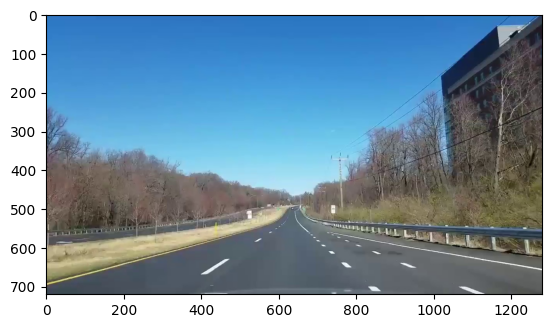

In [5]:
img = mpimg.imread('Easy_test_frames/Easy_Test_frame0.jpg')
plt.imshow(img)

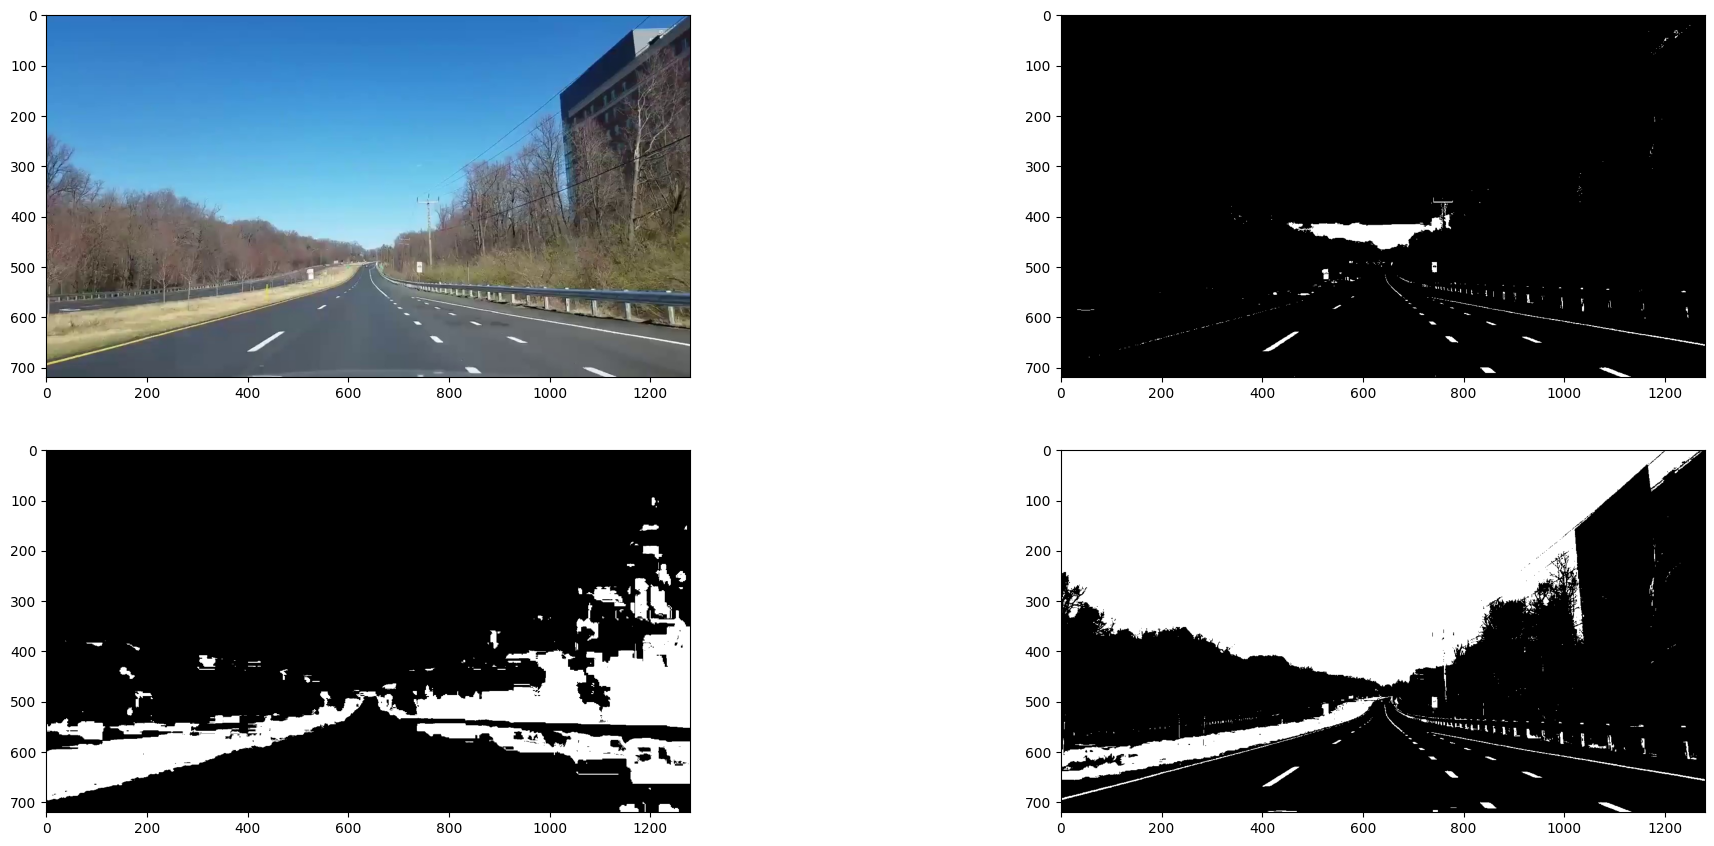

In [30]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(3, 2, 1)
ax1.imshow(img)

right_lane = threshold_rel(l_channel, 0.8, 1.0)
right_lane[:,1300:2600]=0
ax2 = f.add_subplot(3, 2, 2)
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')
ax3 = f.add_subplot(3, 2, 3)
res1 = threshold_abs(h_channel, 20, 70)
res2 = threshold_rel(v_channel, 0.68, 1.0)
ax3.imshow(res1, vmin=0, vmax=255, cmap='gray')
ax4 = f.add_subplot(3, 2, 4)
res2 = threshold_rel(v_channel, 0.68, 1.0)
ax4.imshow(res2, vmin=0, vmax=255, cmap='gray')

In [31]:
class PerspectiveTransformation:
    """ This a class for transforming image between front view and top view

    Attributes:
        src (np.array): Coordinates of 4 source points
        dst (np.array): Coordinates of 4 destination points
        M (np.array): Matrix to transform image from front view to top view
        M_inv (np.array): Matrix to transform image from top view to front view
    """
    def __init__(self):
        """Init PerspectiveTransformation."""
        # self.src = np.float32([(550, 460),     # top-left
        #                        (150, 720),     # bottom-left
        #                        (1200, 720),    # bottom-right
        #                        (770, 460)])    # top-right
        # self.dst = np.float32([(100, 0),
        #                        (100, 720),
        #                        (1100, 720),
        #                        (1100, 0)])

        self.src = np.float32([(1400, 1250),     # top-left
                               (250, 2160),     # bottom-left
                               (3300, 2160),    # bottom-right
                               (2250, 1250)])    # top-right
        self.dst = np.float32([(250, 0),
                               (250, 2160),
                               (3300, 2160),
                               (3300, 0)])

        self.M = cv2.getPerspectiveTransform(self.src, self.dst)
        self.M_inv = cv2.getPerspectiveTransform(self.dst, self.src)

    def forward(self, img, img_size=(3840, 2160), flags=cv2.INTER_LINEAR):
        """ Take a front view image and transform to top view

        Parameters:
            img (np.array): A front view image
            img_size (tuple): Size of the image (width, height)
            flags : flag to use in cv2.warpPerspective()

        Returns:
            Image (np.array): Top view image
        """
        return cv2.warpPerspective(img, self.M, img_size, flags=flags)

    def backward(self, img, img_size=(3840, 2160), flags=cv2.INTER_LINEAR):
        """ Take a top view image and transform it to front view

        Parameters:
            img (np.array): A top view image
            img_size (tuple): Size of the image (width, height)
            flags (int): flag to use in cv2.warpPerspective()

        Returns:
            Image (np.array): Front view image
        """
        return cv2.warpPerspective(img, self.M_inv, img_size, flags=flags)